In [ ]:
__author__ = "Phillip Lakaschus"
__email__ = "lakaschus@th.physik.uni-frankfurt.de"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


0.455902099609375


<Figure size 480x600 with 0 Axes>

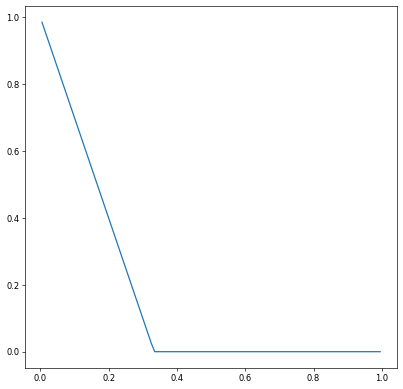

0.0


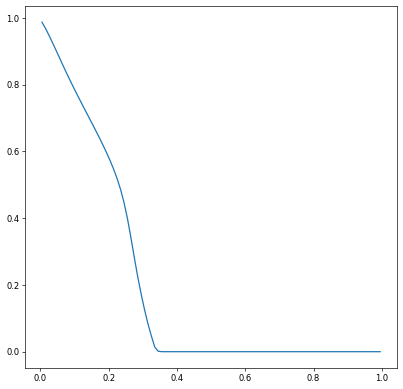

0.03232323232323232


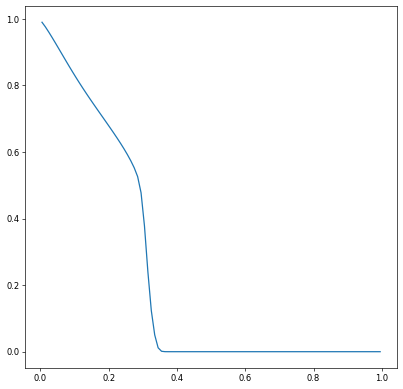

0.06464646464646465


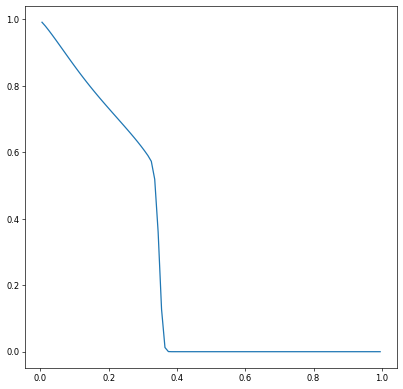

0.09696969696969697


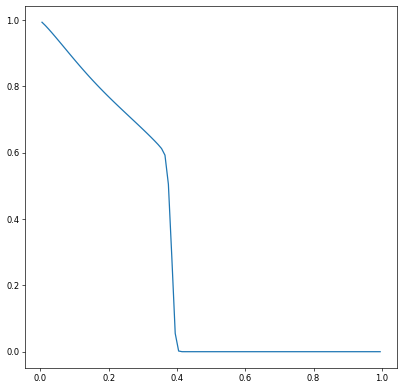

0.1292929292929293


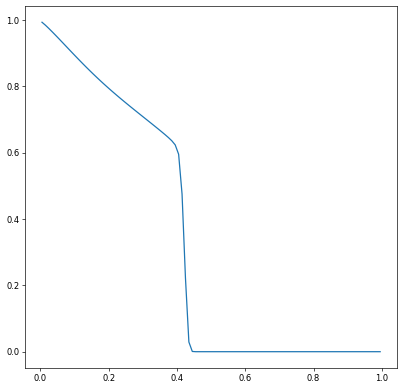

0.1616161616161616


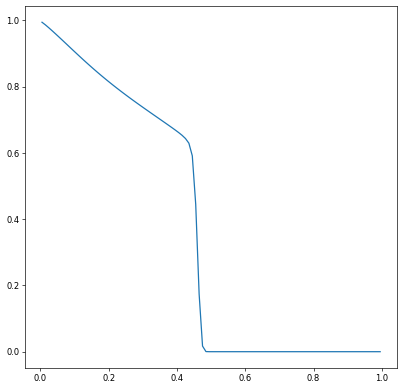

0.19393939393939394
[9.94276208e-01 9.86478824e-01 9.77855455e-01 9.68846124e-01
 9.59620469e-01 9.50258079e-01 9.40808318e-01 9.31309698e-01
 9.21794397e-01 9.12283842e-01 9.02818870e-01 8.93424019e-01
 8.84120335e-01 8.74925283e-01 8.65852777e-01 8.56913332e-01
 8.48114280e-01 8.39460059e-01 8.30952525e-01 8.22591282e-01
 8.14374002e-01 8.06296729e-01 7.98354153e-01 7.90539855e-01
 7.82846512e-01 7.75266073e-01 7.67789894e-01 7.60408842e-01
 7.53113362e-01 7.45893521e-01 7.38739006e-01 7.31639097e-01
 7.24582584e-01 7.17557603e-01 7.10551376e-01 7.03550530e-01
 6.96544914e-01 6.89520835e-01 6.82455403e-01 6.75308211e-01
 6.67997293e-01 6.60335577e-01 6.51857217e-01 6.41283458e-01
 6.24511240e-01 5.65492931e-01 3.78687178e-01 1.06699206e-01
 6.32736682e-03 9.02762651e-05 1.06054454e-06 1.24065178e-08
 1.45133691e-10 1.69944669e-12 1.99243180e-14 2.33870331e-16
 2.74827161e-18 3.23333284e-20 3.80881463e-22 4.49314414e-24
 5.30990225e-26 6.29257010e-28 7.50051422e-30 9.07598052e-32
 1.1

In [1]:
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint

%matplotlib inline

N = 100
xmax = 1
x = np.linspace(0, 1, N+1)
N_t = 100
t = np.linspace(0, 0.2, N_t)

xc = 0.5*np.array(x[:-1]+x[1:])

dx = x[1] - x[0]

u0 = np.heaviside(-3*xc + 1, 1)*(1-3*xc)

start = time.time()  

def minmod(r):
  minmod = (r > 0).astype(int)
  minmod2 = (r < 1).astype(int)
  minmod3 = (r >= 1).astype(int)
  return minmod*minmod2*r + minmod3*np.ones(len(r)) 

def dudt(u, t):
  u = np.append(1, np.append(u, 0))
  
  uLForw = u[0]
  uLCent = u[1:-1] + 1/2*(u[1:-1] - u[:-2])*minmod(np.nan_to_num((u[2:] - u[1:-1])/(u[1:-1] - u[:-2])))
  uL = np.append(uLForw, uLCent)
  
  uRBack = u[-1]
  uRCent = u[1:-1] + 1/2*(u[2:] - u[1:-1])*minmod(np.nan_to_num((u[1:-1] - u[:-2])/(u[2:] - u[1:-1])))
  uR = np.append(uRCent, uRBack)

  FL = uL**2/(uL**2+(1-uL)**2)
  FR = uR**2/(uR**2+(1-uR)**2)
 
  FL_d = (1 + 3*6*uL**5)/4
  FR_d = (1 + 3*6*uR**5)/4
  
  prop = (np.abs(FL_d) >= np.abs(FR_d)).astype(int)*np.abs(FL_d) + (np.abs(FL_d) < np.abs(FR_d)).astype(int)*np.abs(FR_d)
    
  fu_interface = (FL + FR)/2 - prop/2*(uR - uL)
  
  eps = 0.01
  Q1 = eps*4*u[1:-1]*(1-u[1:-1])*(u[2:] - u[1:-1])/dx
  Q2 = eps*4*u[2:]*(1-u[2:])*(u[2:] - u[1:-1])/dx
  Q3 = eps*4*u[:-2]*(1-u[:-2])*(u[1:-1] - u[:-2])/dx
  Q4 = eps*4*u[1:-1]*(1-u[1:-1])*(u[1:-1] - u[:-2])/dx
  
  Pp = 1/2*(Q1 + Q2)
  Pm = 1/2*(Q3 + Q4)
      
  dudt =  (fu_interface[:-1] - fu_interface[1:])/dx + (Pp - Pm)/dx
  return dudt

def construct_potential(x, u):
    return integrate.cumtrapz(u, x, initial=0)

def solution(u0):
    sol = odeint(dudt, u0, t, mxstep=1000,
                 rtol=1e-12)
    # print sol
    return sol

sol = solution(u0)

print(time.time()-start)

plt.figure(figsize=(8, 10), dpi= 60, facecolor='w', edgecolor='k')
#axes = plt.gca()
#axes.set_xlim([0.,.1])
#axes.set_ylim([-0.00001, 0.00005])
#plt.plot(np.sqrt(xc), construct_potential(xc, sol[-1]))
#plt.show()

for i in range(0, N_t, int(N_t/6)):
    plt.figure(figsize=(8, 8), dpi= 60, facecolor='w', edgecolor='k')
    #axes = plt.gca()
    #axes.set_xlim([0.,.1])
    #axes.set_ylim([-0.0005, 0.003])
    plt.plot(xc, sol[i])
    plt.show()
    print(t[i])
    
print(sol[-1])

In [ ]:
np.exp(-2)*cutoff

135.3352832366127